<a href="https://colab.research.google.com/github/suganraj555/Real-Time-Stock-Market/blob/main/Real_Time_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=04c22c82e8bb5211026d6c0400bc3ec38665e709a663bc933634d1ac95869230
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-10-20,128.050003,128.169998,124.970001,125.169998,125.169998,56343300,AMAZON
2023-10-23,124.629997,127.879997,123.980003,126.559998,126.559998,48260000,AMAZON
2023-10-24,127.739998,128.800003,126.339996,128.559998,128.559998,46477400,AMAZON
2023-10-25,126.040001,126.339996,120.790001,121.389999,121.389999,74577500,AMAZON
2023-10-26,120.629997,121.639999,118.349998,119.570000,119.570000,100419500,AMAZON
2023-10-27,126.199997,130.020004,125.519997,127.739998,127.739998,125309300,AMAZON
2023-10-30,129.720001,133.000000,128.559998,132.710007,132.710007,72485500,AMAZON
2023-10-31,132.750000,133.570007,131.710007,133.089996,133.089996,51589400,AMAZON
2023-11-01,133.960007,137.350006,133.710007,137.000000,137.000000,61529400,AMAZON


In [ ]:
df = pdr.get_data_yahoo('MSTF', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-14,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,10000000
2022-12-23,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,5000
2023-01-23,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,80000
2023-01-27,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,20000010
2023-02-17,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,105000
2023-05-04,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1500000
2023-08-11,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,3500000


228/228 [==============================] - 1s 2ms/step
Mean Squared Error: 42.615458915198175
R-squared: 0.6261624323748844


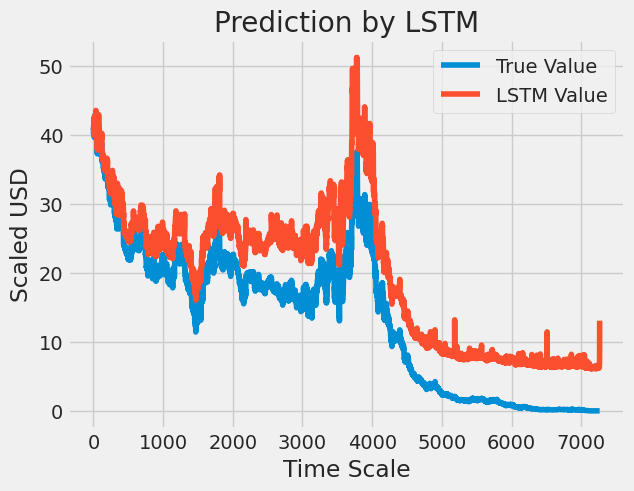

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.sql.window import Window
from pyspark.sql.functions import lag
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from pyspark.ml.feature import SQLTransformer
from pyspark.sql.functions import col
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("StockPrediction").getOrCreate()

# Load the dataset
df = spark.read.csv("/content/MSFT.csv", header=True, inferSchema=True)

# Define the target variable
df = df.withColumnRenamed("Adj Close", "label")

# Select the features
feature_columns = ['Open', 'High', 'Low', 'Volume']

# Create a vector assembler to combine features into a single vector
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

# Define the LSTM model using Keras
model = Sequential()
model.add(LSTM(32, input_shape=(1, len(feature_columns)), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Create a SQLTransformer to convert the scaled features into an array
sql_transformer = SQLTransformer(statement="SELECT *, array(scaled_features) as features_array FROM __THIS__")

# Split the data into train and test sets
train_size = int(0.8 * df.count())
train_data, test_data = df.limit(train_size), df.limit(train_size).orderBy('Date', ascending=False)

# Define a window specification for time series data
window_spec = Window.orderBy('Date')

# Create a pipeline for feature processing and modeling
pipeline = Pipeline(stages=[vector_assembler, scaler, sql_transformer])

# Fit the pipeline on the training data
pipeline_model = pipeline.fit(train_data)

# Transform the training and test data
train_data = pipeline_model.transform(train_data)
test_data = pipeline_model.transform(test_data)

# Convert the transformed data to Pandas for further LSTM modeling
train_data = train_data.toPandas()
test_data = test_data.toPandas()

# Convert the Pandas DataFrames to NumPy arrays
X_train = np.array(train_data['features_array'].to_list())
X_test = np.array(test_data['features_array'].to_list())
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

# Reshape the data for LSTM


# Train the LSTM model
model.fit(X_train, y_train, epochs=1, batch_size=8, verbose=1, shuffle=False)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print the MSE and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the predicted vs true Adj Close values
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

# Stop the Spark session
spark.stop()


Mean Squared Error: 3.7135649315730714
Root Mean Squared Error (RMSE): 1.927061216353303
R-squared (R2): 0.9674233220390805
+----------+---------+------------------+
|      Date|    label|        prediction|
+----------+---------+------------------+
|2015-01-06|40.132988|33.031758691052914|
|2015-01-05|40.730808| 35.44141634956898|
|2015-01-02|41.108837|34.869744409101976|
|2014-12-31|  40.8363| 34.49691238175935|
|2014-12-30|41.337418| 35.06929153545546|
|2014-12-29|41.715446| 36.01232724183285|
|2014-12-26|42.093487| 36.23908952662725|
|2014-12-24|42.322052|36.522813243635014|
|2014-12-23|42.594597| 36.49822604746201|
|2014-12-22|42.181404| 36.77623276997342|
|2014-12-19| 41.90007|35.073040614778044|
|2014-12-18|41.776989|  34.0354259607255|
|2014-12-17|40.212116| 33.20346196168764|
|2014-12-16|39.702209| 32.73564422847592|
|2014-12-15|41.029709|34.118312204284926|
|2014-12-12|41.275875| 34.61063138922493|
|2014-12-11|41.469288|34.471958693827894|
|2014-12-10|41.231915| 34.4417150649

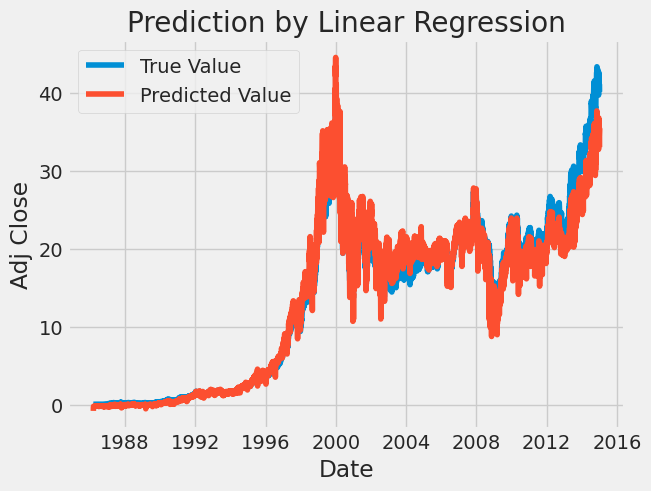

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("StockPrediction").getOrCreate()

# Load the dataset
df = spark.read.csv("/content/MSFT.csv", header=True, inferSchema=True)

# Define the target variable
df = df.withColumnRenamed("Adj Close", "label")

# Select the features
feature_columns = ['Open', 'High', 'Low', 'Volume']

# Create a vector assembler to combine features into a single vector
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

# Create a LinearRegression model
lr = LinearRegression(featuresCol="scaled_features", labelCol="label")

# Create a pipeline for feature processing and modeling
pipeline = Pipeline(stages=[vector_assembler, scaler, lr])

# Split the data into train and test sets
train_size = int(0.8 * df.count())
train_data, test_data = df.limit(train_size), df.limit(train_size).orderBy('Date', ascending=False)

# Fit the pipeline on the training data
pipeline_model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = pipeline_model.transform(test_data)

# Evaluate the model (calculate Mean Squared Error)
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)
print("Mean Squared Error:", mse)
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate and print the R-squared (R2) score
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
print("R-squared (R2):", r2)

# Show the predicted vs. true Adj Close values
predictions.select("Date", "label", "prediction").show()

# Optionally, you can visualize the results
predictions_pd = predictions.select("Date", "label", "prediction").toPandas()

plt.plot(predictions_pd["Date"], predictions_pd["label"], label='True Value')
plt.plot(predictions_pd["Date"], predictions_pd["prediction"], label='Predicted Value')
plt.title("Prediction by Linear Regression")
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()

# Stop the Spark session
spark.stop()


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

Accuracy: 1.0


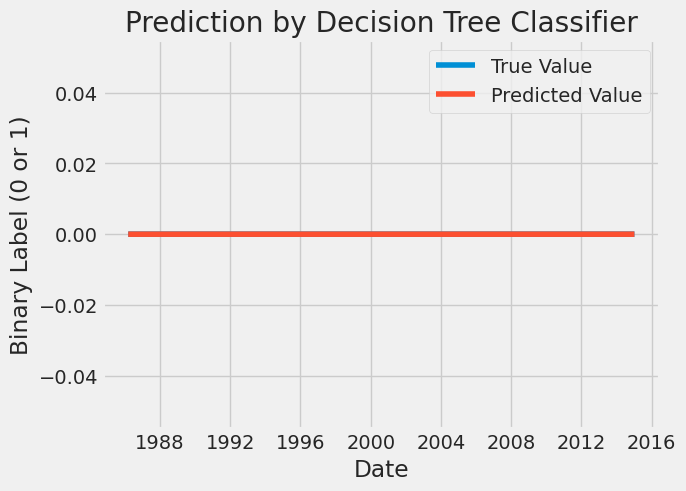

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("StockPrediction").getOrCreate()

# Load the dataset
df = spark.read.csv("/content/MSFT.csv", header=True, inferSchema=True)

# Define the target variable and convert it to a binary label (you may need to adjust this logic)
df = df.withColumnRenamed("Adj Close", "label")
df = df.withColumn("label", (df["label"] > df["label"].cast("double")).cast("double"))

# Select the features
feature_columns = ['Open', 'High', 'Low', 'Volume']

# Create a vector assembler to combine features into a single vector
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

# Create a Decision Tree Classifier model
dt = DecisionTreeClassifier(featuresCol="scaled_features", labelCol="label")

# Create a pipeline for feature processing and modeling
pipeline = Pipeline(stages=[vector_assembler, scaler, dt])

# Split the data into train and test sets
train_size = int(0.8 * df.count())
train_data, test_data = df.limit(train_size), df.limit(train_size).orderBy('Date', ascending=False)

# Fit the pipeline on the training data
pipeline_model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = pipeline_model.transform(test_data)

# Evaluate the model (calculate accuracy or other classification metrics)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# Optionally, you can visualize the results
predictions_pd = predictions.select("Date", "label", "prediction").toPandas()

plt.plot(predictions_pd["Date"], predictions_pd["label"], label='True Value')
plt.plot(predictions_pd["Date"], predictions_pd["prediction"], label='Predicted Value')
plt.title("Prediction by Decision Tree Classifier")
plt.xlabel('Date')
plt.ylabel('Binary Label (0 or 1)')
plt.legend()
plt.show()

# Stop the Spark session
spark.stop()
